# Classification performance of AdaBoost model

Plot the classification scores of the optimized AdaBoost model with all four metadata features and top mutation matrix over 14 test seasons from 2014NH to 2020SH.

## Imports

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context(rc={'axes.labelsize':9,
                    'xtick.labelsize':8,
                    'ytick.labelsize':8,
                    'legend.fontsize':8,
                    'legend.title_fontsize':8})

## Paths and filenames

In [2]:
path_result = "../results/SuppFig5a_classification_scores/"   # results will be saved in this directory
Path(path_result).mkdir(parents=True, exist_ok=True)   # make directory if it does not exist already

test_fn     = "../results/Fig2_model_evaluation/Fig2_performance_testScores.csv"   # performance scores for test dataset

## Read test scores and prepare data for plots

In [3]:
metrics = ['Accuracy', 'Sensitivity', 'Specificity', 'MCC']

scores = pd.read_csv(test_fn)
scores = scores[['season']+metrics]

'''
for heatmap change to matrix form
'''
# set season as index
df = scores.set_index('season')

# transpose index and columns
df = df.transpose()

## Plot classification scores per season

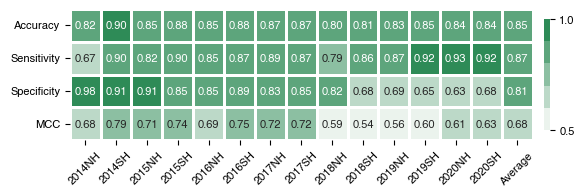

In [4]:
fig, ax = plt.subplots(figsize=(7.2,1.7))

tmp = sns.heatmap(df,
                  annot=True, annot_kws={'size':8}, fmt='.2f',
                  vmin=0.5,
                  vmax=1,
                  cmap=sns.light_palette('seagreen', 5),
                  cbar_kws={'shrink':0.85, 'orientation':'vertical', 'pad':0.02},
                  linewidths=1,
                  # square=True,
                  ax=ax)

# configurations for figure
cbar = tmp.collections[0].colorbar
cbar.ax.set_yticks([cbar.ax.get_yticks()[0], cbar.ax.get_yticks()[-1]])

tmp.set_xticklabels(tmp.get_xticklabels(), rotation=45)
ax.set_xlabel('')
ax.set_ylabel('')

# save figure
fig_fn = path_result+"SuppFig5a_classification_scores.svg"
fig.savefig(fig_fn, format='svg', bbox_inches='tight')